In [1]:
# Load packages
import requests 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# specify url of data set in csv format
url = "City_Zhvi_AllHomes_kaggle.csv" 
#labelurl = "http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data" 

# use pandas to read in csv data set
temp_df = pd.read_csv(url) #, delimiter=' ', skip_blank_lines=True)

# specify row names
#temp_labels = pd.read_csv(labelurl, header=None, delimiter=' ')


In [6]:
# see the raw dataset shape and head

print(temp_df.shape)
temp_df.head(10)

(10730, 251)


,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
5,18959,Las Vegas,NV,Las Vegas,Clark,6,121600.0,120900.0,120400.0,120300.0,...,190600,192000,193600,194800,195400,196100,197300,198200,199300,200600
6,54296,San Diego,CA,San Diego,San Diego,7,161100.0,160700.0,160400.0,160100.0,...,525700,526700,527800,529200,531000,533900,536900,537900,539000,540500
7,38128,Dallas,TX,Dallas-Fort Worth,Dallas,8,NaN,NaN,NaN,NaN,...,134600,136600,138700,140600,142200,143300,144500,146000,148200,150400
8,33839,San Jose,CA,San Jose,Santa Clara,9,224500.0,224900.0,225400.0,226100.0,...,789700,792100,795800,803100,811900,817600,819100,820100,821700,822700
9,25290,Jacksonville,FL,Jacksonville,Duval,10,77500.0,77200.0,76800.0,76600.0,...,132000,132500,133100,133900,134900,136000,137200,138400,139500,140300


In [10]:
states_present = temp_df['State'].unique()

print(states_present.shape)

(50,)


In [30]:
# visualize the lineplot of value over months for each state separately

st_series = np.zeros([245,50])

k = 0

for st in states_present:
    
    temp_mat = temp_df.loc[temp_df['State']==st]
    
    temp_mat = temp_mat.iloc[:,6:]
    
    st_avg = np.nanmean(temp_mat,axis=0)
    #print(np.shape(st_avg))
    
    st_series[:,k] = st_avg
    k = k + 1
    
    
states_df = pd.DataFrame(st_series)
states_df.columns = states_present
states_df.head(10)    

C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


,NY,CA,IL,PA,AZ,NV,TX,FL,MI,OH,...,MS,CT,DE,MT,NH,ND,WY,WV,VT,ME
0,126453.571429,179656.405990,145169.461078,103674.025974,106306.796117,140736.842105,78475.396825,103161.553785,106702.583026,99460.217984,...,62755.000000,151776.923077,99896.0,NaN,100380.701754,NaN,NaN,60583.333333,NaN,NaN
1,126434.415584,179786.522463,145348.203593,103614.502165,106407.766990,140657.894737,83195.862069,102693.542074,106143.642612,99733.787466,...,62595.000000,152321.428571,100148.0,NaN,102463.076923,NaN,NaN,60991.666667,120450.0,NaN
2,126452.597403,179830.282862,145630.538922,102478.705637,106487.378641,140521.052632,83074.000000,102418.199609,106530.240550,100038.692098,...,62528.333333,152853.296703,100688.0,NaN,102713.076923,NaN,NaN,61391.666667,118250.0,NaN
3,126503.896104,179902.163062,145795.808383,102484.655532,106555.339806,140589.473684,83232.000000,102198.825832,106293.877551,100401.362398,...,62640.000000,153133.516484,101172.0,NaN,102870.769231,NaN,NaN,61433.333333,115250.0,NaN
4,126484.253247,180058.069884,145772.455090,102493.736952,106652.427184,140684.210526,84634.177215,102085.322896,106612.585034,100768.119891,...,62740.000000,153288.461538,101580.0,NaN,102875.384615,NaN,NaN,61133.333333,111900.0,NaN
5,126356.980519,180311.813644,145659.580838,102487.682672,106718.446602,140542.105263,84763.291139,102051.272016,106884.693878,101081.471390,...,62798.333333,153423.626374,101948.0,NaN,102908.461538,NaN,NaN,60900.000000,108750.0,NaN
6,126200.162338,180707.653910,145664.670659,102530.062630,106827.184466,140463.157895,85054.430380,102074.755382,107154.081633,101344.959128,...,62880.000000,153573.626374,102176.0,NaN,102852.307692,NaN,NaN,60875.000000,106350.0,NaN
7,125979.220779,181226.622296,145844.011976,102705.114823,106971.844660,140805.263158,85832.278481,102157.534247,109868.666667,101632.697548,...,62916.666667,153818.131868,102200.0,NaN,102801.538462,NaN,NaN,60733.333333,104600.0,NaN
8,125814.448052,181925.291181,145986.826347,102960.229645,107203.883495,141400.000000,86886.075949,102388.649706,110310.000000,101925.340599,...,62810.000000,154183.516484,102104.0,NaN,102866.923077,NaN,NaN,60375.000000,103250.0,NaN
9,126053.409091,183010.482529,146295.209581,103271.503132,107571.844660,142015.789474,91179.365079,102832.485323,110802.333333,102315.803815,...,62773.333333,154733.516484,102156.0,NaN,103136.153846,NaN,NaN,60091.666667,101850.0,NaN


Text(0, 0.5, 'Mean Property Value')

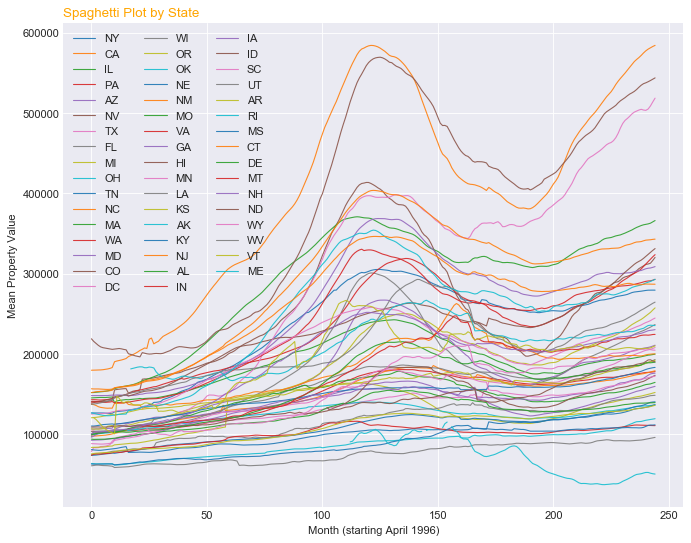

In [46]:
# style
plt.style.use('seaborn-darkgrid')

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# multiple line plot
for col in states_df:
    plt.plot(states_df[col], marker='', linewidth=1, alpha=0.9, label=col)
 
# Add legend
plt.legend(loc=2, ncol=3)
 
# Add titles
plt.title("Spaghetti Plot by State", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Month (starting April 1996)")
plt.ylabel("Mean Property Value")
